<a href="https://colab.research.google.com/github/clm448/Romanas/blob/main/Image_downloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook to download images

Images webpage: http://ftp.itacyl.es/cartografia/01_Ortofotografia/2009/ 

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

In [ ]:
# Check if you can see the Romanos y neuronas directory
!ls -lt drive/MyDrive/Neuronas\ y\ romanos/Colab\ Notebooks

total 6878
-rw------- 1 root root   26775 Apr 24 18:36  Image_downloader.ipynb
drwx------ 2 root root    4096 Apr  4 11:04  Shapefile
drwx------ 2 root root    4096 Apr  4 10:57  maps
-rw------- 1 root root    9192 Apr  4 10:54  Testing_gdal.ipynb
-rw------- 1 root root    1840 Feb 10 20:42  CANYrelief1.jpg.aux.xml
-rw------- 1 root root  182175 Feb 10 20:42  CANYrelief1.jpg
-rw------- 1 root root 6803623 Feb 10 19:23  CANYrelief1-geo.tif
-rw------- 1 root root   10155 Feb 10 18:46 'Romanos y neuronas'


In [ ]:
# Move to Neuronas y romanos
%cd drive/MyDrive/Neuronas\ y\ romanos/Colab\ Notebooks/

/content/drive/.shortcut-targets-by-id/1Yix9skf3TXRqvLjODkRa8AicR8Xl93NV/Neuronas y romanos/Colab Notebooks


In [ ]:
# Library needed to download maps from url
import requests

import sys, os

# Create directory to store images
output_folder = "maps"
os.system("mkdir -p {}".format(output_folder))

# Web page with the maps database
web_page = "http://ftp.itacyl.es/cartografia/01_Ortofotografia/2009/"

# Just one random map to see if it works
file_name = "Color/H-0056/PNOA_CYL_NE_2009_25cm_OF_rgb_etrs_hu30_h05_0056_1-7.tif"

response = requests.get(web_page + file_name)

file = open(output_folder + "/sample_image.tif", "wb")

file.write(response.content)

file.close()

In [ ]:
# Check if the download actually worked
!ls -lrt maps

total 24772
-rw------- 1 root root 25366264 Apr 18 16:37 sample_image.tif


In [ ]:
# Now, more difficult: using the shapefile
# Reference github page: https://github.com/GeospatialPython/pyshp
# Reference PyPi page: https://pypi.org/project/pyshp/

# First of all, install the PyShp library

!pip install pyshp


     |████████████████████████████████| 225kB 8.5MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=2e84d955cdad2c0aa1287c64791c4dc4f8e5fca17a5a3225f782429d5b7f64bc
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


In [ ]:
# Library needed to read shapefiles
import shapefile

# Load shapefile
sf = shapefile.Reader("Shapefile/E50_area.shp")

# Printing metadata
print(sf)   

shapefile Reader
    1115 shapes (type 'POLYGON')


In [ ]:
# Reading geometry
shapes = sf.shapes()

# Print number of shapes
print(len(shapes))

1115


In [ ]:
# Selecting 8th entry
s = sf.shape(7)

# Print coordinates of the 8th entry's bounding box
print(['%.3f' % coord for coord in s.bbox])

['-5.187', '43.333', '-4.854', '43.500']


In [ ]:
# The coordinates meaning should be:
# [west_bound, south_bound, east_bound, north_bound]

In [ ]:
# Plot all the points in a 2D map
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

lat_list = []
long_list = []
for i in range(len(shapes)):
  s = sf.shape(i)
  long_list.append(0.5*(s.bbox[0] + s.bbox[2]))
  lat_list.append(0.5*(s.bbox[1] + s.bbox[3]))
lat_array = np.array(lat_list)
long_array = np.array(long_list)


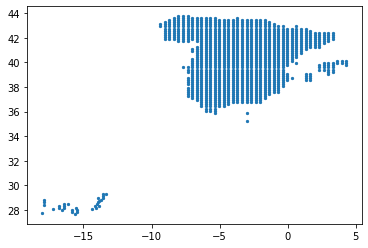

In [ ]:
# Actual plotting
fig, ax = plt.subplots()

ax.scatter(x = long_array, 
        y = lat_array, 
        s = 5)

In [ ]:
# Given a pair of coordinate (lat, long), show where the point is

# Prepare reference latitudes and longitudes
lat_south_list = []
lat_north_list = []
long_east_list = []
long_west_list = []
for i in range(len(shapes)):
  s = sf.shape(i)
  long_west_list.append(s.bbox[0])
  lat_south_list.append(s.bbox[1])
  long_east_list.append(s.bbox[2])
  lat_north_list.append(s.bbox[3])
lat_south_array = np.array(lat_south_list)
lat_north_array = np.array(lat_north_list)
long_east_array = np.array(long_east_list)
long_west_array = np.array(long_west_list)


In [ ]:
# Put everything into a dataframe (not sure if this is useful)

#df = pd.DataFrame(np.concatenate([arr1, arr2, arr3], axis=1), columns= ['a','b','c'])
df_coordinates = pd.DataFrame()

df_coordinates['lat_south_array']= lat_south_array
df_coordinates['lat_north_array']= lat_north_array
df_coordinates['long_east_array']= long_east_array
df_coordinates['long_west_array']= long_west_array

df_coordinates.head()

,lat_south_array,lat_north_array,long_east_array,long_west_array
0,43.333333,43.5,-7.187500,-7.520833
1,43.333333,43.5,-6.854167,-7.187500
2,43.333333,43.5,-6.520833,-6.854167
3,43.333333,43.5,-6.187500,-6.520833
4,43.333333,43.5,-5.854167,-6.187500


In [ ]:
# Function that returns the df entry corresponding to a pair of coordinates (lat, long)
def find_point(lat, 
               long, 
               df_ref = df_coordinates):
  
  """Given lat and long, returns the shapefile entry."""

  cont = 0
  for index, row in df_ref.iterrows():
    cont = cont+1
    if (lat >= row['lat_south_array'] and
        lat < row['lat_north_array'] and 
        long >= row['long_west_array'] and 
        long < row['long_east_array']):
      #print(row['lat_south_array'], row['lat_north_array'], row['long_west_array'], row['long_east_array'])
      break
  return cont-1
  

In [ ]:
# Test the function
my_lat = 42
my_long = -3

cell = find_point(my_lat, my_long, df_coordinates)
print("This coordinates can be found in cell number {}".format(cell))
print()
print("Here the coordinates of cell {}:".format(cell))
print(df_coordinates.iloc[cell])

This coordinates can be found in cell number 313

Here the coordinates of cell 313:
lat_south_array    41.833333
lat_north_array    42.000000
long_east_array    -2.854167
long_west_array    -3.187500
Name: 313, dtype: float64
